In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('phishing.csv')

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.drop(['Index'],axis=1,inplace=True)

In [5]:
df.sample(10)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
506,1,1,1,1,1,1,-1,1,-1,1,...,1,1,-1,-1,1,-1,1,1,1,1
5180,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,0,1,-1,1,1,1
9890,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
7722,1,-1,1,1,1,-1,1,0,1,1,...,1,1,-1,1,-1,-1,1,0,1,-1
453,1,-1,1,1,1,-1,0,0,1,1,...,1,1,1,1,-1,-1,1,0,1,-1
2546,1,1,1,1,1,1,0,1,-1,1,...,1,1,1,1,1,1,1,0,1,1
5625,-1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,1,1,1,-1,-1
9716,-1,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,1,1,1,1,-1,1,0,1,-1
9795,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,-1,1
3651,1,1,1,1,1,1,1,1,-1,1,...,1,1,1,1,-1,-1,1,1,1,1


In [6]:
df.nunique()

UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [8]:
df.isnull().any()

UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool

In [9]:
df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['class'].sample(10)

2194   -1
73     -1
8850    1
6061   -1
6625    1
6463   -1
6442    1
3624   -1
760     1
1554   -1
Name: class, dtype: int64

In [11]:
df['class'].nunique()

2

In [12]:
df['class'].unique()

array([-1,  1])

In [13]:
df['class'].value_counts()

 1    6157
-1    4897
Name: class, dtype: int64

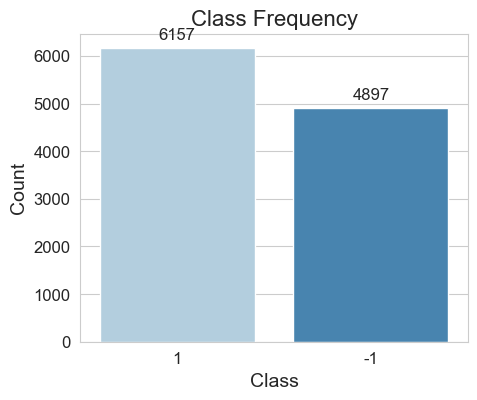

In [14]:
plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")
ax = sns.countplot(x='class', data=df, order=df['class'].value_counts().index, palette='Blues')
plt.title('Class Frequency', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=12)

plt.show()

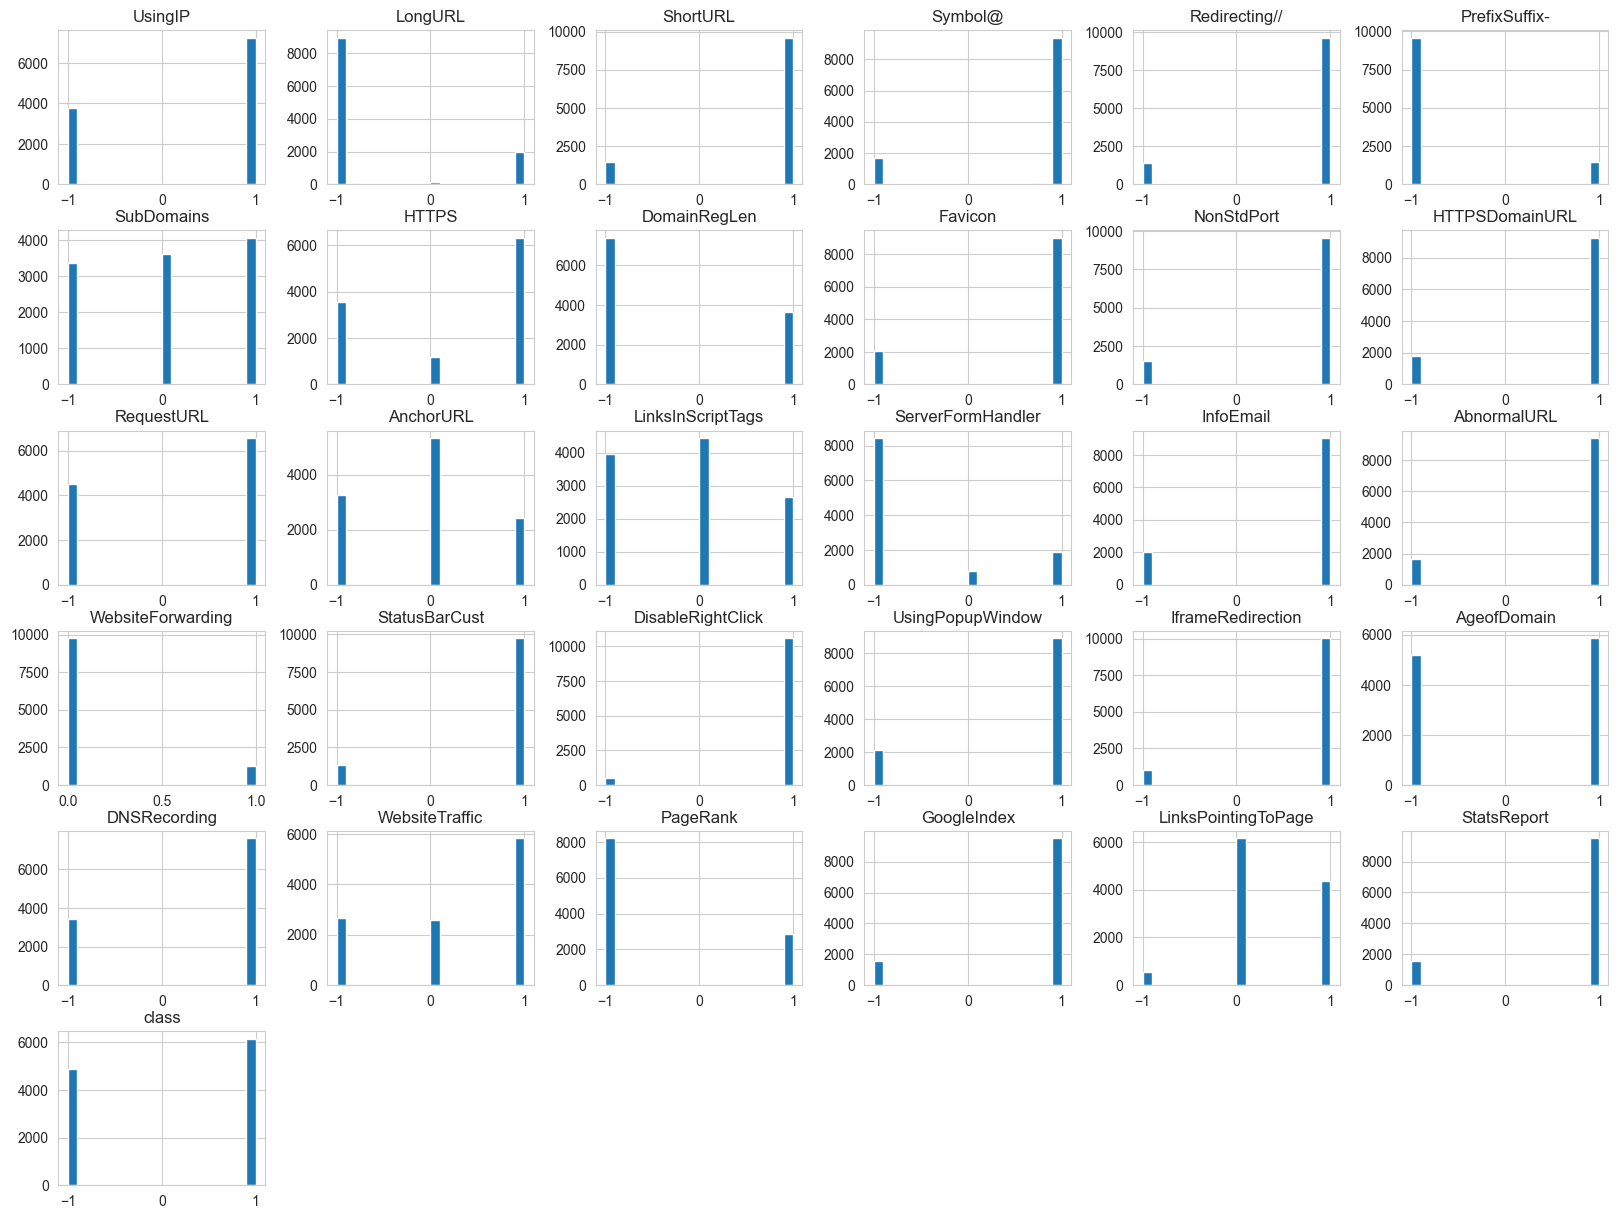

In [15]:
df.hist(figsize=(20, 15), bins=20)
plt.show()

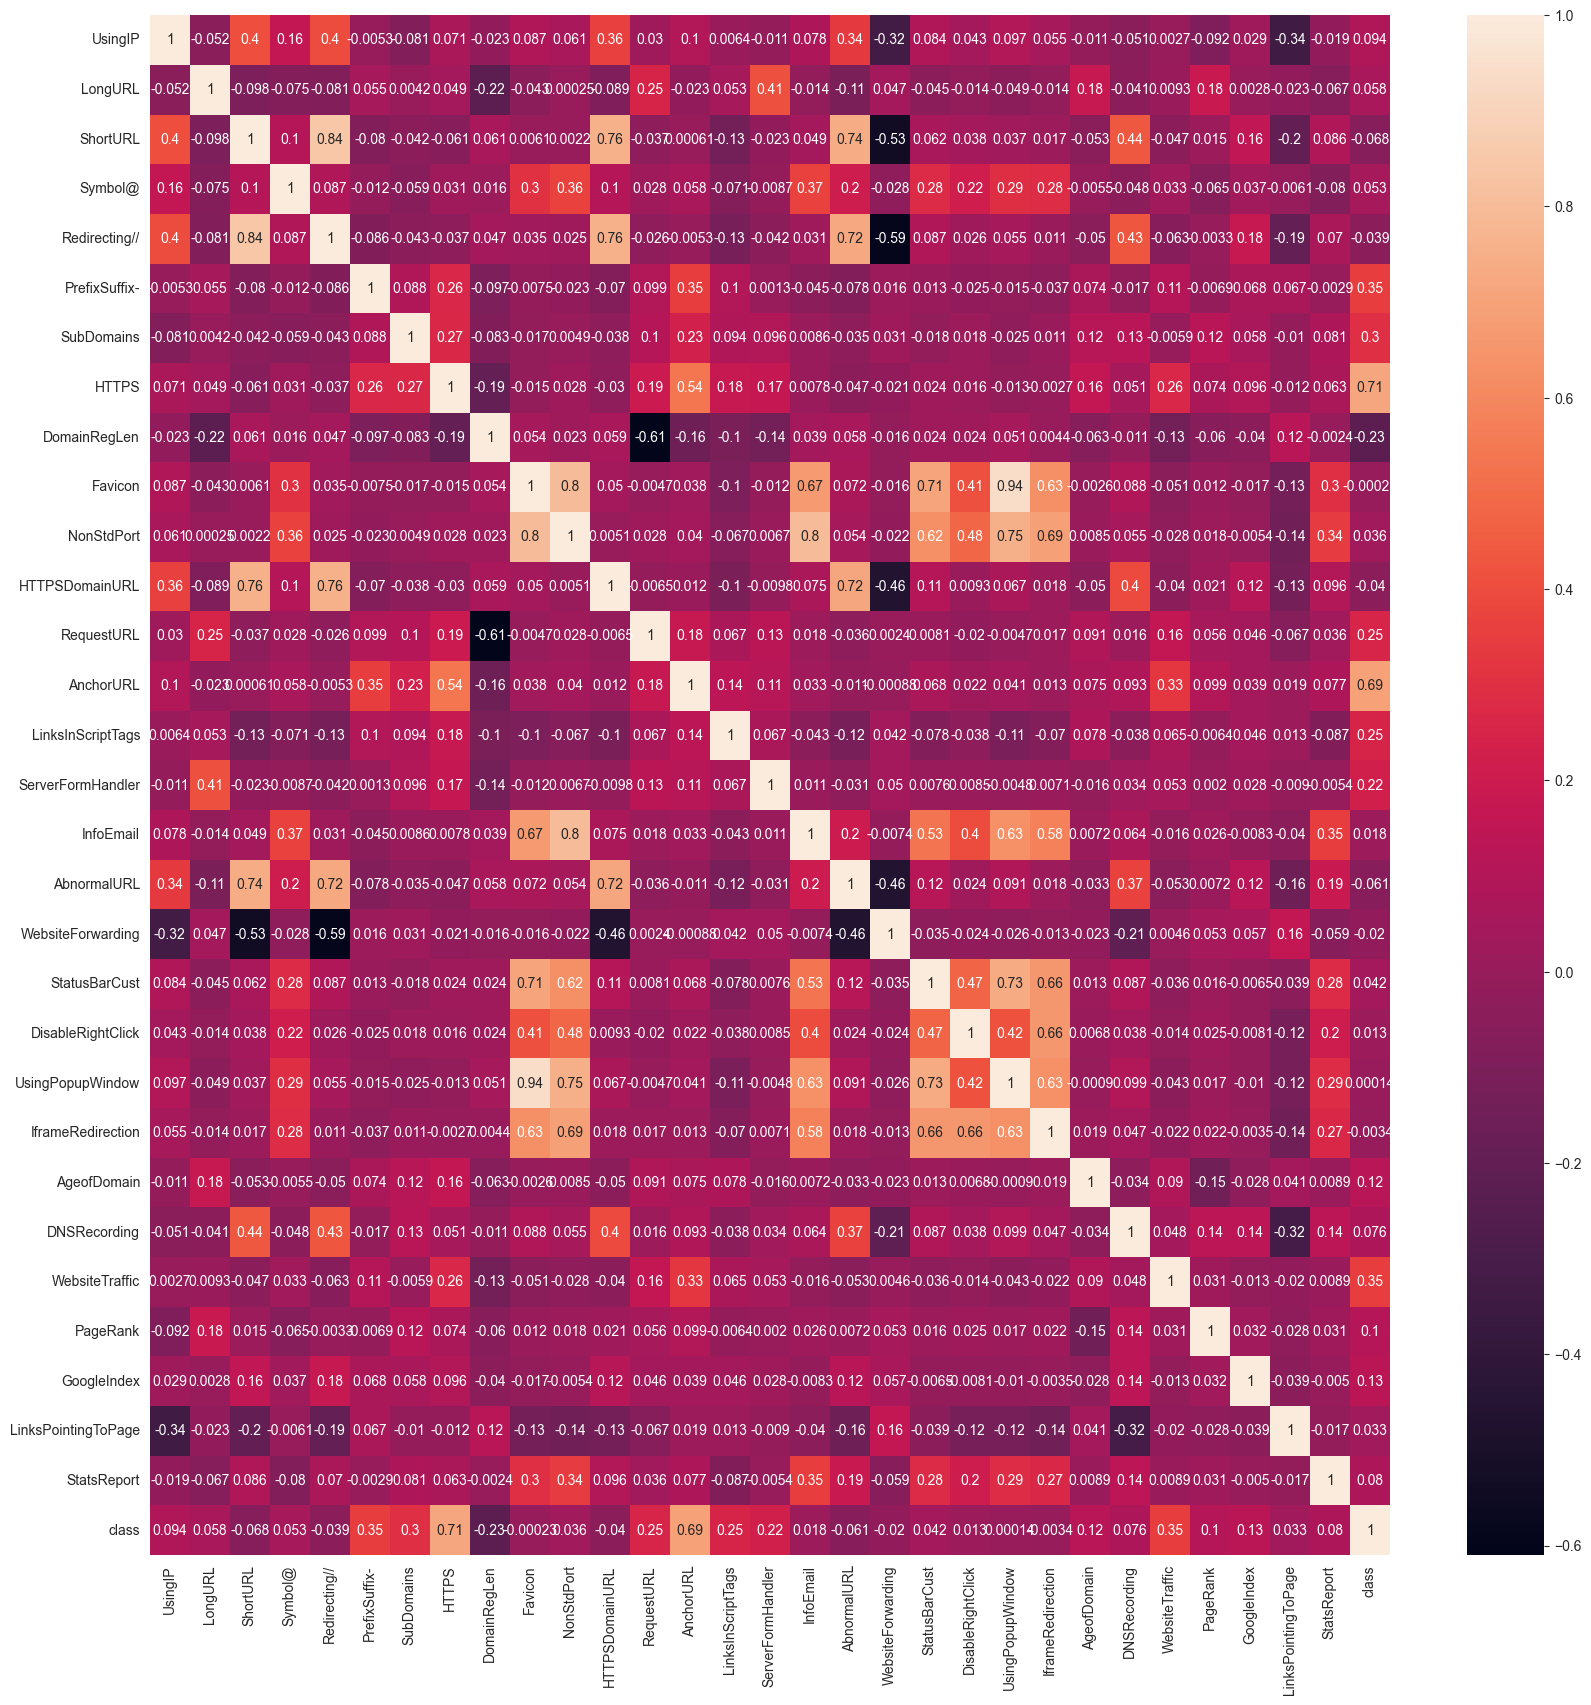

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(['class'],axis=1)

In [19]:
y = df['class']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25)

In [21]:
X_train.shape

(8290, 30)

In [22]:
X_test.shape

(2764, 30)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,Y_train)

print(model.score(X_test,Y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(Y_test,y_pred)


clf = classification_report(Y_test, y_pred)


print('Accuracy :' , model.score(X_test,Y_test)*100 )


0.9312590448625181
Accuracy : 93.12590448625181


In [24]:
cm

array([[1111,  116],
       [  74, 1463]])

In [25]:
print(clf)

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92      1227
           1       0.93      0.95      0.94      1537

    accuracy                           0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



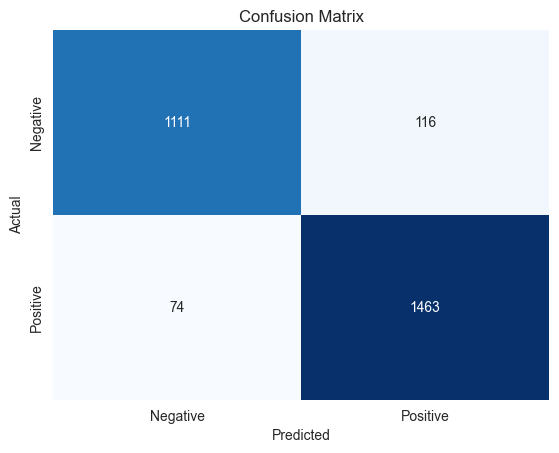

In [26]:

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 10, 20, None],
          'min_samples_split': [2, 5, 10, 20],
          'min_samples_leaf': [1, 2, 4, 8]}


dt = DecisionTreeClassifier()


random_search = RandomizedSearchCV(dt, params, n_iter=50, cv=5)

random_search.fit(X_train, Y_train)

print(random_search.best_params_)

y_pred1 = random_search.predict(X_test)

print(accuracy_score(Y_test, y_pred1))

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
0.9623733719247467


In [28]:
modeldt = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 1, max_depth= 20, criterion= 'gini')

In [29]:
modeldt

DecisionTreeClassifier(max_depth=20)

In [30]:
modeldt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20)

In [31]:
modeldt.score(X_test,Y_test)

0.9663531114327062

In [32]:
y_preddt = modeldt.predict(X_test)

In [33]:
cmdt = confusion_matrix(Y_test,y_preddt)


clfdt = classification_report(Y_test, y_preddt)


print('Accuracy :' , modeldt.score(X_test,Y_test)*100 )


Accuracy : 96.63531114327061


In [34]:
cmdt

array([[1184,   43],
       [  50, 1487]])

In [35]:
print(clfdt)

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1227
           1       0.97      0.97      0.97      1537

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



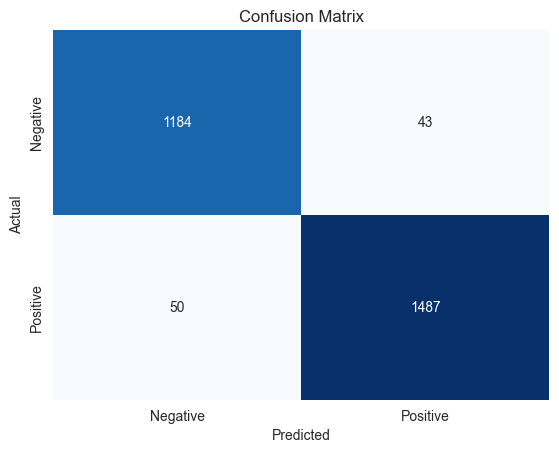

In [36]:
sns.heatmap(cmdt, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 10],
    'criterion': ['gini', 'entropy']
}


rf = RandomForestClassifier()


grid_searchrf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_searchrf.fit(X_train, Y_train)


print("Best parameters: ", grid_searchrf.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [38]:
y_prf = grid_searchrf.predict(X_test)
print(accuracy_score(Y_test, y_prf))

0.9725036179450073


In [39]:
modelrf = RandomForestClassifier(criterion= 'gini', max_depth= 20, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)

In [40]:
modelrf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=500)

In [41]:
modelrf.score(X_test,Y_test)

0.9710564399421129

In [42]:
y_predrf = modelrf.predict(X_test)

In [43]:
cmrf = confusion_matrix(Y_test,y_predrf)


clfrf = classification_report(Y_test, y_predrf)


print('Accuracy :' , modelrf.score(X_test,Y_test)*100 )

Accuracy : 97.10564399421129


In [44]:
cmrf

array([[1186,   41],
       [  39, 1498]])

In [45]:
print(clfrf)

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1227
           1       0.97      0.97      0.97      1537

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



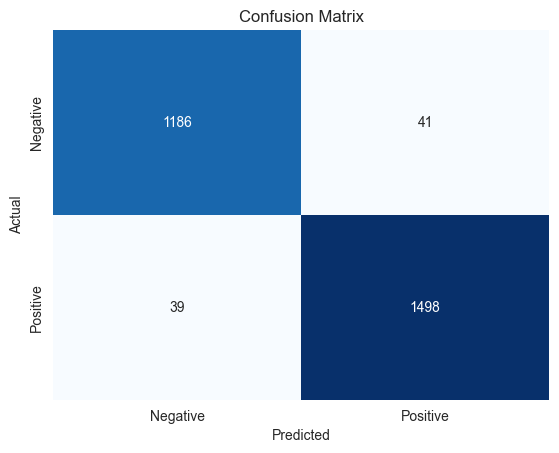

In [46]:
sns.heatmap(cmrf, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

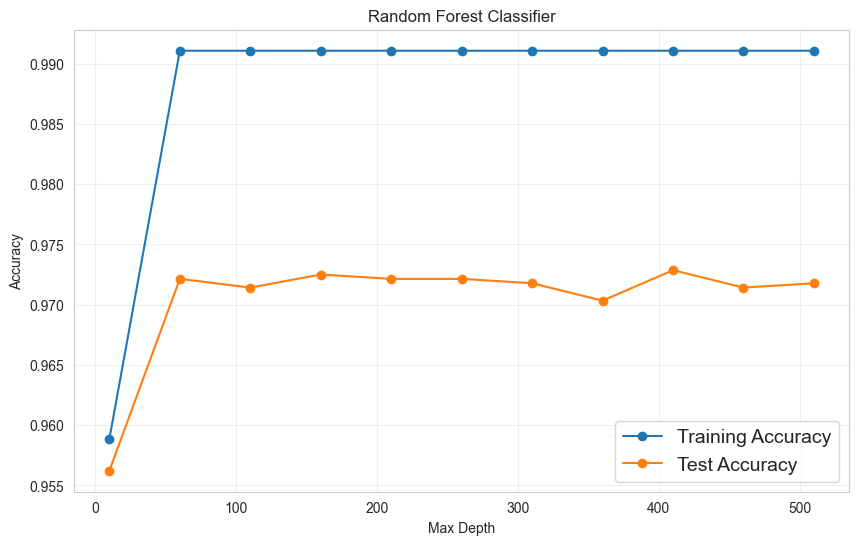

In [47]:

depths = range(10, 551, 50)

train_acc = []
test_acc = []


for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100)
    rf.fit(X_train, Y_train)

  
    train_pred = rf.predict(X_train)
    train_acc.append(accuracy_score(Y_train, train_pred))


    test_pred = rf.predict(X_test)
    test_acc.append(accuracy_score(Y_test, test_pred))


plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, 'o-', label='Training Accuracy')
plt.plot(depths, test_acc, 'o-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier')
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [48]:
from sklearn.svm import SVC



param_gridsvc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

modelsvc = SVC()


grid_searchsvc = GridSearchCV(estimator = modelsvc, param_grid = param_gridsvc, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_searchsvc.fit(X_train, Y_train)


print("Best parameters: ", grid_searchsvc.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [49]:
y_psvc = grid_searchsvc.predict(X_test)

In [50]:
print(accuracy_score(Y_test,y_psvc))

0.967438494934877


In [51]:
modelfsvm = SVC(C= 100, gamma= 'scale', kernel= 'rbf')

In [52]:
modelfsvm.fit(X_train,Y_train)

SVC(C=100)

In [53]:
y_predsvm = modelfsvm.predict(X_test)

In [54]:
modelfsvm.score(X_test,Y_test)

0.9659913169319826

In [55]:
cmsvm = confusion_matrix(Y_test,y_predsvm)


clfsvm = classification_report(Y_test, y_predsvm)


In [56]:
cmsvm

array([[1177,   50],
       [  44, 1493]])

In [57]:
print(clfsvm)

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1227
           1       0.97      0.97      0.97      1537

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



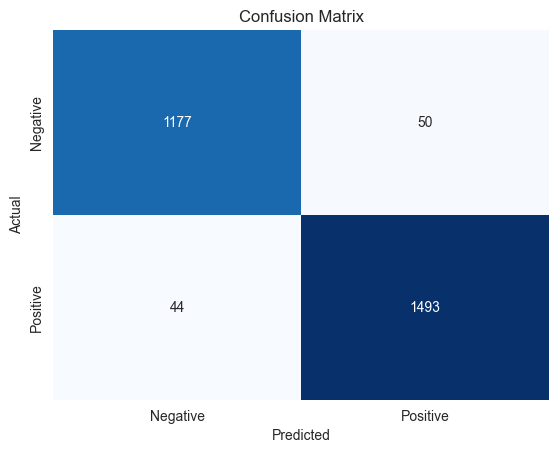

In [58]:
sns.heatmap(cmsvm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

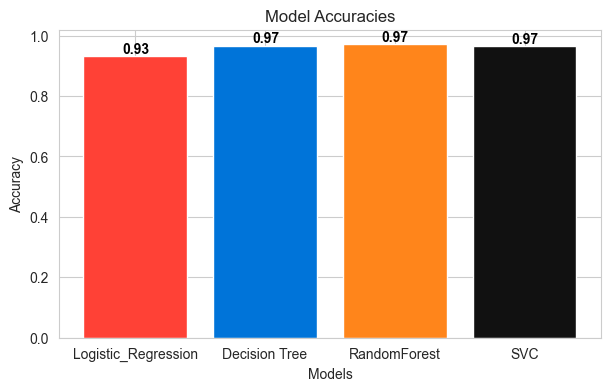

In [59]:
models = ['Logistic_Regression', 'Decision Tree', 'RandomForest', 'SVC']
accuracies = [accuracy_score(Y_test,y_pred), accuracy_score(Y_test,y_preddt), accuracy_score(Y_test,y_predrf), accuracy_score(Y_test,y_predsvm)]

plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color= ['#FF4136', '#0074D9', '#FF851B', '#111111'])

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')


for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, str(round(v,2)), color='black', fontweight='bold')


plt.show()